Link to supporting video for below notebook walkhthrough - https://www.youtube.com/watch?v=91QljBnvM7s

In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Failed to initialize NVML: Driver/library version mismatch


In [2]:
!apt-get install default-jre
!java -version

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
openjdk version "11.0.20.1" 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [3]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 12.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl.metadata (6.6 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 8.5 MB/s eta 0:00:00
Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=ddf5f26ab805088b1014e3593241e4cce034151c2fefdd6d82b490696f5ce11d
  Stored in directory: /home/saeed/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully bu

In [4]:
 import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /home/saeed/Documents/Github/CatDB/.venv/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwp81cgl_
  JVM stdout: /tmp/tmpwp81cgl_/h2o_saeed_started_from_python.out
  JVM stderr: /tmp/tmpwp81cgl_/h2o_saeed_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Toronto
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_saeed_b4pt38
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.744 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [7]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
churn_df.types

{'Churn': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'DeviceProtection': 'enum',
 'InternetService': 'enum',
 'MonthlyCharges': 'real',
 'MultipleLines': 'enum',
 'OnlineBackup': 'enum',
 'OnlineSecurity': 'enum',
 'PaperlessBilling': 'enum',
 'Partner': 'enum',
 'PaymentMethod': 'enum',
 'PhoneService': 'enum',
 'SeniorCitizen': 'int',
 'StreamingMovies': 'enum',
 'StreamingTV': 'enum',
 'TechSupport': 'enum',
 'TotalCharges': 'real',
 'customerID': 'string',
 'gender': 'enum',
 'tenure': 'int'}

In [8]:
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059919,2283.300440841866,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.36861160561001305,,,24.55948102309446,,,,,,,,,,,,,30.090047097678493,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [9]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [10]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No


In [11]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [12]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [13]:
!nvidia-smi

Failed to initialize NVML: Driver/library version mismatch


In [14]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
15:23:50.707: Project: AutoML_1_20231103_152350
15:23:50.707: Cross-validation disabled by user: no fold column nor nfolds > 1.
15:23:50.708: Setting stopping tolerance adaptively based on the training frame: 0.014258097780117078
15:23:50.708: Build control seed: 10
15:23:50.709: training frame: Frame key: AutoML_1_20231103_152350_training_py_2_sid_b55d    cols: 21    rows: 4919  chunks: 48    size: 768210  checksum: 5732310781112957819
15:23:50.709: validation frame: Frame key: py_4_sid_b55d    cols: 21    rows: 1084  chunks: 48    size: 642199  checksum: 7801861387689759678
15:23:50.709: leaderboard frame: Frame key: py_4_sid_b55d    cols: 21    rows: 1084  chunks: 48    size: 642199  checksum: 7801861387689759678
15:23:50.709: blending frame: NULL
15:23:50.709: response column: Churn
15:23:50.709: fold column: null
15:23:50.710: weights column: null
15:23:50.727: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 9

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20231103_152350


GLM Model: summary
    family    link    regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    binomial  logit   Ridge ( lambda = 4.477E-4 )  nlambda = 30, lambda.max = 15.948, lambda.min = 4.477E-4, lambda.1se = -1.0  45                            45                             45                      AutoML_1_20231103_152350_training_py_2_sid_b55d

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13538719420812195
RMSE: 0.36794998873233026
LogLoss: 0.4169783597754353
AUC: 0.8483257111851795
AUCPR: 0.6690442691599445
Gini: 0.696651422370359
Null degrees of freedom: 4918
Residual degrees of freedom: 4873
Null deviance: 5741.81675190101
Residual deviance: 4102.233103470732
AIC: 4194.233103470732

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2947180526142517
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2703  886    0.2469   (886.0/3589.0)
Yes    285   1045   0.2143   (285.0/1330.0)
Total  2988  1931   0.2381   (1171.0/4919.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.294718     0.640908  223
max f2                       0.166066     0.76072   290
max f0point5                 0.543198     0.648398  115
max accuracy                 0.543198     0.807075  115
max precision                0.852177     1         0
max recall                   0.0045696    1         396
max specificity              0.852177     1         0
max absolute_mcc             0.294718     0.490115  223
max min_per_class_accuracy   0.307346     0.764001  217
max mean_per_class_accuracy  0.257714     0.771517  242
max tns                      0.852177     3589      0
max fns                      0.852177     1328      0
max fps                      0.00214923   3589      399
max tps                      0.0045696    1330      396
max tnr                      0.852177     1         0
max fnr                      0.852177     0.998496  0
max fpr                      0.00214923   1         399
max tpr                      0.0045696    1         396

Gains/Lift Table: Avg response rate: 27.04 %, avg score: 27.04 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101647                   0.789644           3.10674    3.10674            0.84             0.812009    0.84                        0.812009            0.0315789       0.0315789                  210.674   210.674            0.0293499
2        0.020126                    0.767966           3.3211     3.21284            0.897959         0.77979     0.868687                    0.796062            0.0330827       0.0646617                  232.11    221.284            0.0610395
3        0.0300874                   0.750838           3.09466    3.17371            0.836735         0.758583    0.858108                    0.783653            0.0308271       0.0954887               

In [15]:
!nvidia-smi

Failed to initialize NVML: Driver/library version mismatch


In [16]:
lb = aml.leaderboard

In [17]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20231103_152350,0.836427,0.404076,0.603365,0.239506,0.360568,0.130009
GBM_1_AutoML_1_20231103_152350,0.835298,0.405053,0.606534,0.241913,0.361962,0.131016
GBM_2_AutoML_1_20231103_152350,0.826401,0.414698,0.601365,0.252396,0.364789,0.133071
XGBoost_3_AutoML_1_20231103_152350,0.826396,0.416443,0.598222,0.256089,0.368002,0.135425
GBM_3_AutoML_1_20231103_152350,0.820696,0.422257,0.592492,0.254803,0.369854,0.136792
XRT_1_AutoML_1_20231103_152350,0.819021,0.423012,0.581018,0.259191,0.37049,0.137263
GBM_4_AutoML_1_20231103_152350,0.818458,0.428417,0.591489,0.254808,0.370652,0.137383
XGBoost_1_AutoML_1_20231103_152350,0.817183,0.429076,0.574799,0.261088,0.372477,0.138739
XGBoost_2_AutoML_1_20231103_152350,0.81495,0.434394,0.574207,0.270956,0.375381,0.140911
DRF_1_AutoML_1_20231103_152350,0.813606,0.432617,0.5919,0.260482,0.371677,0.138144


In [18]:
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [19]:
churn_pred.head()

predict,No,Yes
No,0.988142,0.0118584
Yes,0.601956,0.398044
No,0.96014,0.0398604
Yes,0.44863,0.55137
No,0.965802,0.0341982
No,0.790918,0.209082
No,0.984744,0.015256
Yes,0.335174,0.664826
No,0.851905,0.148095
No,0.792267,0.207733


In [20]:
aml.leader.model_performance(churn_test)

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13479699457277244
RMSE: 0.3671471020895745
LogLoss: 0.41320888756992913
AUC: 0.8536407226725529
AUCPR: 0.6657781330636359
Gini: 0.7072814453451057
Null degrees of freedom: 1039
Residual degrees of freedom: 994
Null deviance: 1223.503174148278
Residual deviance: 859.4744861454526
AIC: 951.4744861454526

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33832008071089203
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     592   162    0.2149   (162.0/754.0)
Yes    64    222    0.2238   (64.0/286.0)
Total  656   384    0.2173   (226.0/1040.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.33832      0.662687  200
max f2                       0.174715     0.772834  277
max f0point5                 0.490911     0.64433   136
max accuracy                 0.490911     0.803846  136
max precision                0.85264      1         0
max recall                   0.0056067    1         393
max specificity              0.85264      1         0
max absolute_mcc             0.392008     0.521041  177
max min_per_class_accuracy   0.330103     0.777188  203
max mean_per_class_accuracy  0.283413     0.786774  222
max tns                      0.85264      754       0
max fns                      0.85264      285       0
max fps                      0.00176541   754       399
max tps                      0.0056067    286       393
max tnr                      0.85264      1         0
max fnr                      0.85264      0.996503  0
max fpr                      0.00176541   1         399
max tpr                      0.0056067    1         393

Gains/Lift Table: Avg response rate: 27.50 %, avg score: 27.79 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0105769                   0.790953           2.97521    2.97521            0.818182         0.809173    0.818182                    0.809173            0.0314685       0.0314685                  197.521   197.521            0.028816
2        0.0201923                   0.774498           2.90909    2.94372            0.8              0.780818    0.809524                    0.795671            0.027972        0.0594406                  190.909   194.372            0.0541355
3        0.0307692                   0.750055           3.30579    3.06818            0.909091         0.756025    0.84375                     0.782043            0.034965        0.0944056                  230.579   206.818            0.0877743
4        0.0403846                   0.743433           3.27273    3.11688            0.9              0.74593     0.857143                    0.773445            0.0314685       0.125874                   227.273   211.688            0.117917
5        0.05                        0.731267           2.90909    3.07692            0.8              0.736159    0.846154                    0.766274            0.027972        0.153846                   190.909   207.692            0.143236
6        0.1                         0.663925           2.51748    2.7972             0.692308         0.698246    0.769231                    0.73226             0.125874        0.27972                    151.748   179.72             0.24789
7        0.15                        0.618074           2.0979     2.5641             0.576923         0.638953    0.705128           

In [21]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [22]:
model_ids

['GLM_1_AutoML_1_20231103_152350',
 'GBM_1_AutoML_1_20231103_152350',
 'GBM_2_AutoML_1_20231103_152350',
 'XGBoost_3_AutoML_1_20231103_152350',
 'GBM_3_AutoML_1_20231103_152350',
 'XRT_1_AutoML_1_20231103_152350',
 'GBM_4_AutoML_1_20231103_152350',
 'XGBoost_1_AutoML_1_20231103_152350',
 'XGBoost_2_AutoML_1_20231103_152350',
 'DRF_1_AutoML_1_20231103_152350']

In [23]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20231103_152350


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.10626139500492415
RMSE: 0.3259775989311599
LogLoss: 0.334422756165446
Mean Per-Class Error: 0.17738191256910735
AUC: 0.9113436628629249
AUCPR: 0.7952241446759245
Gini: 0.8226873257258498

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3875668453318732
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3128  461    0.1284   (461.0/3589.0)
Yes    301   1029   0.2263   (301.0/1330.0)
Total  3429  1490   0.1549   (762.0/4919.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.387567     0.729787  197
max f2                       0.191251     0.808901  283
max f0point5                 0.56332      0.743768  130
max accuracy                 0.496059     0.853019  156
max precision                0.967201     1         0
max recall                   0.0175676    1         382
max specificity              0.967201     1         0
max absolute_mcc             0.387567     0.623669  197
max min_per_class_accuracy   0.332713     0.831151  221
max mean_per_class_accuracy  0.326249     0.832672  224
max tns                      0.967201     3589      0
max fns                      0.967201     1329      0
max fps                      0.00215199   3589      399
max tps                      0.0175676    1330      382
max tnr                      0.967201     1         0
max fnr                      0.967201     0.999248  0
max fpr                      0.00215199   1         399
max tpr                      0.0175676    1         382

Gains/Lift Table: Avg response rate: 27.04 %, avg score: 26.93 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101647                   0.919255           3.6985     3.6985             1                0.935696    1                           0.935696            0.037594        0.037594                   269.85    269.85             0.037594
2        0.020126                    0.895243           3.54754    3.62378            0.959184         0.90603     0.979798                    0.921013            0.0353383       0.0729323                  254.754   262.378            0.0723751
3        0.0302907                   0.872814           3.47659    3.57439            0.94             0.883205    0.966443                    0.908325            0.0353383       0.108271                   247.659   257.439            0.106878
4        0.0400488                   0.849406           3.15913    3.47321            0.854167         0.860444    0.939086                    0.896659            0.0308271       0.139098                   215.913   247.321            0.135754
5        0.0500102                   0.82543            3.24562    3.42787            0.877551         0.839224    0.926829                    0.885219            0.0323308       0.171429                   224.562   242.787            0.166413
6        0.10002                     0.712595           3.14222    3.28505            0.849593         0.767361    0.888211                    0.82629             0.157143        0.328571                   214.222   228.505            0.313247
7        0.15003                     0.610351           2.73629    3.10213

In [24]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [25]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20231103_152350',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20231103_152350'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231103_152350_training_py_2_sid_b55d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231103_152350_training_py_2_sid_b55d'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20231103_152350_training_py_2_sid_b55d',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20231103_152350_training_py_2_sid_b55d'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schem

In [26]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_2_AutoML_20200106_011717


Model Summary: 


,,number_of_trees
0,,85.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.11463685881524834
RMSE: 0.33858065333868137
LogLoss: 0.36311309011473725
Mean Per-Class Error: 0.18470830772382718
AUC: 0.8936131171891006
AUCPR: 0.7615483662521837
Gini: 0.7872262343782013

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3606812246143818: 


,,No,Yes,Error,Rate
0,No,2752.0,502.0,0.1543,(502.0/3254.0)
1,Yes,284.0,916.0,0.2367,(284.0/1200.0)
2,Total,3036.0,1418.0,0.1765,(786.0/4454.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.360681,0.699771,206.0
1,max f2,0.235889,0.794122,265.0
2,max f0point5,0.583763,0.720965,116.0
3,max accuracy,0.495243,0.838348,151.0
4,max precision,0.923532,1.000000,0.0
5,max recall,0.022820,1.000000,394.0
6,max specificity,0.923532,1.000000,0.0
7,max absolute_mcc,0.379353,0.581268,197.0
8,max min_per_class_accuracy,0.315295,0.807007,226.0
9,max mean_per_class_accuracy,0.288407,0.815292,239.0



Gains/Lift Table: Avg response rate: 26.94 %, avg score: 27.35 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010103,0.882697,3.464222,3.464222,0.933333,0.901923,0.933333,0.901923,0.035000,0.035000,246.422222,246.422222
1,,2,0.020207,0.855541,3.711667,3.587944,1.000000,0.867949,0.966667,0.884936,0.037500,0.072500,271.166667,258.794444
2,,3,0.030085,0.829599,3.458598,3.545473,0.931818,0.843338,0.955224,0.871277,0.034167,0.106667,245.859848,254.547264
3,,4,0.040189,0.813237,3.134296,3.442104,0.844444,0.820567,0.927374,0.858529,0.031667,0.138333,213.429630,244.210428
4,,5,0.050067,0.791322,3.458598,3.445359,0.931818,0.801340,0.928251,0.847245,0.034167,0.172500,245.859848,244.535874
5,,6,0.100135,0.686146,2.962676,3.204017,0.798206,0.738535,0.863229,0.792890,0.148333,0.320833,196.267564,220.401719
6,,7,0.149978,0.599372,2.808829,3.072682,0.756757,0.639037,0.827844,0.741759,0.140000,0.460833,180.882883,207.268214
7,,8,0.200045,0.519963,2.097175,2.828532,0.565022,0.559085,0.762065,0.696039,0.105000,0.565833,109.717489,182.853161
8,,9,0.299955,0.383621,1.709869,2.455923,0.460674,0.449520,0.661677,0.613928,0.170833,0.736667,70.986891,145.592315
9,,10,0.400090,0.268587,1.198386,2.141186,0.322870,0.325506,0.576880,0.541741,0.120000,0.856667,19.838565,114.118593




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.13200930891094706
RMSE: 0.36333085323289993
LogLoss: 0.4065191866668133
Mean Per-Class Error: 0.21935274064770793
AUC: 0.8530052929039204
AUCPR: 0.6761107367846269
Gini: 0.7060105858078407

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38777639468510944: 


,,No,Yes,Error,Rate
0,No,654.0,131.0,0.1669,(131.0/785.0)
1,Yes,84.0,200.0,0.2958,(84.0/284.0)
2,Total,738.0,331.0,0.2011,(215.0/1069.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.387776,0.650407,181.0
1,max f2,0.167549,0.754773,281.0
2,max f0point5,0.471985,0.644410,144.0
3,max accuracy,0.471985,0.810103,144.0
4,max precision,0.920657,1.000000,0.0
5,max recall,0.024334,1.000000,391.0
6,max specificity,0.920657,1.000000,0.0
7,max absolute_mcc,0.389219,0.513706,180.0
8,max min_per_class_accuracy,0.310758,0.764085,217.0
9,max mean_per_class_accuracy,0.248484,0.780647,244.0



Gains/Lift Table: Avg response rate: 26.57 %, avg score: 27.18 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010290,0.898883,3.764085,3.764085,1.000000,0.910360,1.000000,0.910360,0.038732,0.038732,276.408451,276.408451
1,,2,0.020580,0.874588,3.079706,3.421895,0.818182,0.887892,0.909091,0.899126,0.031690,0.070423,207.970551,242.189501
2,,3,0.030870,0.844898,3.764085,3.535958,1.000000,0.858250,0.939394,0.885500,0.038732,0.109155,276.408451,253.595817
3,,4,0.040225,0.821185,3.387676,3.501474,0.900000,0.830053,0.930233,0.872606,0.031690,0.140845,238.767606,250.147396
4,,5,0.050514,0.791687,3.421895,3.485263,0.909091,0.808192,0.925926,0.859484,0.035211,0.176056,242.189501,248.526343
5,,6,0.100094,0.672021,2.130614,2.814269,0.566038,0.715380,0.747664,0.788105,0.105634,0.281690,113.061387,181.426879
6,,7,0.150608,0.590287,2.230569,2.618494,0.592593,0.632172,0.695652,0.735805,0.112676,0.394366,123.056860,161.849357
7,,8,0.200187,0.526436,2.343675,2.550431,0.622642,0.558755,0.677570,0.691956,0.116197,0.510563,134.367526,155.043109
8,,9,0.300281,0.393655,1.758918,2.286593,0.467290,0.449514,0.607477,0.611142,0.176056,0.686620,75.891799,128.659339
9,,10,0.400374,0.281592,1.196064,2.013961,0.317757,0.337617,0.535047,0.542761,0.119718,0.806338,19.606424,101.396110




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-01-06 01:17:25,0.002 sec,0.0,0.500000,0.693147,0.500000,0.000000,1.000000,0.730579,0.500000,0.693147,0.500000,0.000000,1.000000,0.734331
1,,2020-01-06 01:17:26,0.322 sec,5.0,0.451306,0.599465,0.864095,0.650674,3.486717,0.225415,0.451369,0.599555,0.855019,0.612469,3.450411,0.197381
2,,2020-01-06 01:17:26,0.543 sec,10.0,0.417875,0.537171,0.867374,0.700870,3.484422,0.204311,0.418241,0.537659,0.858810,0.677673,3.513146,0.201123
3,,2020-01-06 01:17:26,0.788 sec,15.0,0.395782,0.494959,0.870006,0.707311,3.474752,0.210597,0.397467,0.497480,0.858590,0.688202,3.450411,0.207671
4,,2020-01-06 01:17:26,1.005 sec,20.0,0.381068,0.465116,0.871990,0.713065,3.469601,0.210597,0.383858,0.469220,0.860119,0.682457,3.764085,0.217961
5,,2020-01-06 01:17:26,1.244 sec,25.0,0.370788,0.442708,0.873594,0.720191,3.464222,0.209699,0.374983,0.448909,0.860153,0.685266,3.764085,0.208606
6,,2020-01-06 01:17:27,1.433 sec,30.0,0.363515,0.425682,0.874957,0.720912,3.464222,0.207678,0.369251,0.434260,0.859561,0.683473,3.474540,0.208606
7,,2020-01-06 01:17:27,1.600 sec,35.0,0.358498,0.413048,0.876798,0.728192,3.464222,0.198249,0.366187,0.424738,0.859056,0.682699,3.474540,0.199252
8,,2020-01-06 01:17:27,1.855 sec,40.0,0.354522,0.402953,0.879462,0.732853,3.464222,0.201617,0.364337,0.418383,0.858242,0.684977,3.450411,0.192703
9,,2020-01-06 01:17:27,2.064 sec,45.0,0.351564,0.394884,0.880912,0.735681,3.464222,0.175573,0.362666,0.412550,0.858552,0.686469,3.764085,0.202058



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,3655.777832,1.000000,0.256163
1,TotalCharges,2007.098267,0.549021,0.140639
2,tenure,1818.509888,0.497434,0.127424
3,MonthlyCharges,1745.274536,0.477402,0.122292
4,TechSupport.No,732.165771,0.200276,0.051303
5,OnlineSecurity.No,715.071289,0.195600,0.050105
6,InternetService.Fiberoptic,570.084229,0.155941,0.039946
7,Contract.Twoyear,481.123566,0.131606,0.033713
8,PaymentMethod.Electroniccheck,284.173859,0.077733,0.019912
9,PaperlessBilling.No,220.357941,0.060277,0.015441



See the whole table with table.as_data_frame()


In [ ]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [ ]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3606812246143818: 


,,No,Yes,Error,Rate
0,No,2752.0,502.0,0.1543,(502.0/3254.0)
1,Yes,284.0,916.0,0.2367,(284.0/1200.0)
2,Total,3036.0,1418.0,0.1765,(786.0/4454.0)


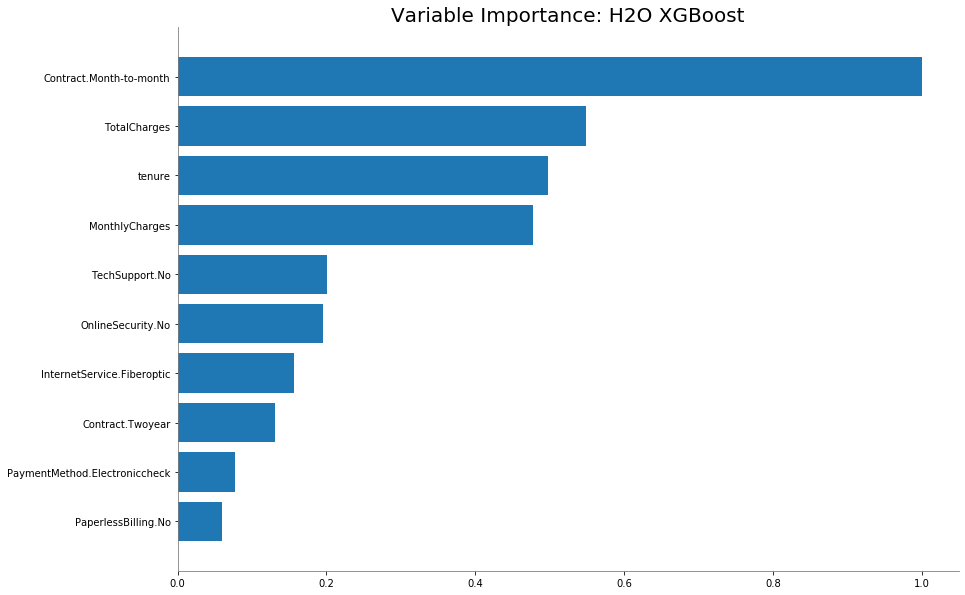

In [ ]:
out.varimp_plot()

In [ ]:
aml.leader.download_mojo(path = "./")

'/content/XGBoost_2_AutoML_20200106_011717.zip'